In [1]:
!pip install konlpy
!pip install wordcloud

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from bokeh.plotting import figure
import random
from konlpy.tag import Komoran
tagger = Komoran()
from collections import Counter
from wordcloud import WordCloud
import networkx as nx
import re
import math
plt.rcParams["font.family"] = 'NanumGothic'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

In [2]:
from importlib import reload
plt=reload(plt)

plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/data_journalism/movie_df.xlsx',mode="rb") as excel_file:
    DF = pd.read_excel(excel_file)

In [5]:
DF

title  year  audience                 date        genre  \
0                  범죄도시 2  2022  12693023  2022-05-18 00:00:00       범죄, 액션   
1                 탑건: 매버릭  2022   8171923  2022-06-22 00:00:00           액션   
2               한산: 용의 출현  2022   7262885  2022-07-27 00:00:00      액션, 드라마   
3              공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00      액션, 코미디   
4     닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00  액션, 판타지, 모험   
...                   ...   ...       ...                  ...          ...   
4291               무림 악인전  1980     20342  1980-04-10 00:00:00           액션   
4292                   복권  1980     20307  1980-06-21 00:00:00          NaN   
4293             바다로 간 목마  1980     20041  1980-10-18 00:00:00          NaN   
4294           최인호의 병태 만세  1980     18332  1980-12-12 00:00:00          NaN   
4295                해뜨는 집  1980     17987  1980-12-06 00:00:00          NaN   

                                                  actor country  \
0           마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화    대한민국   
1     톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...      미국   
2     박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
3               현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국   
4     베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...      미국   
...                                                 ...     ...   
4291                       정진화, 서영란, 장일식, 정진화, 서영란, 장일식    대한민국   
4292                       정진화, 김명아, 김기주, 정진화, 김명아, 김기주    대한민국   
4293                                 장미희, 윤일봉, 장미희, 윤일봉    대한민국   
4294                       엄인태, 이미영, 정한용, 엄인태, 이미영, 정한용    대한민국   
4295                       강주희, 이승현, 김정훈, 강주희, 이승현, 김정훈    대한민국   

              director      age  score  \
0             이상용, 이상용  15세 관람가   9.32   
1     조셉 코신스키, 조셉 코신스키  12세 관람가   9.76   
2             김한민, 김한민  12세 관람가   8.75   
3             이석훈, 이석훈  15세 관람가   8.44   
4         샘 레이미, 샘 레이미  12세 관람가   7.22   
...                ...      ...    ...   
4291      김정용, 김정용, 신고      NaN   7.00   
4292          김정용, 김정용  12세 관람가   0.00   
4293      정진우, 정진우, 신고  12세 관람가   6.29   
4294          김수형, 김수형  12세 관람가   0.00   
4295      석래명, 석래명, 신고   전체 관람가   9.44   

                                               synopsis  
0     ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1     ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2     ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3     ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4     ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
...                                                 ...  
4291  ['고구려가 요동땅을 다스릴때 막대한 황금엽전을 그곳에 매장한다. 고려왕조가 기울어...  
4292  ['이대복은 신체조건이 맞지않아 공초대사로부터 다른길을 가라는 가르침을 받고 하산한...  
4293  ['여대생 주희(장미희 분)는 11년 연상의 농아학교 교사 이민우(윤일봉 분)를 사...  
4294  ['신학기가 시작되자 철학과 강의실에 편입생 순철이 들어오므로 병태와 친숙해진다. ...  
4295  ['영아는 말괄량이로 엄마와 둘이 살아간다. 영아는 친구들과 어울려 미팅장소엘 갔다...  

[4296 rows x 11 columns]

In [6]:
DF.columns = ['title','year','audience','date','genre','actor','country','director','age','score','synopsis']
DF["title"]=DF["title"].apply(str)
DF["genre"]=DF["genre"].apply(str)
DF["actor"]=DF["actor"].apply(str)
DF["director"]=DF["director"].apply(str)
DF["age"] = DF["age"].apply(str)

In [7]:
DF['genre']=DF['genre'].replace(["멜로"],'로맨스')

In [8]:
DF[DF['year']==2022]

title  year  audience                 date         genre  \
0                범죄도시 2  2022  12693023  2022-05-18 00:00:00        범죄, 액션   
1               탑건: 매버릭  2022   8171923  2022-06-22 00:00:00            액션   
2             한산: 용의 출현  2022   7262885  2022-07-27 00:00:00       액션, 드라마   
3            공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00       액션, 코미디   
4   닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00   액션, 판타지, 모험   
..                  ...   ...       ...                  ...           ...   
95              어나더 라운드  2022     36126  2022-01-19 00:00:00           드라마   
96            배니싱: 미제사건  2022     35164  2022-03-30 00:00:00       범죄, 스릴러   
97                뒤틀린 집  2022     34886  2022-07-13 00:00:00  공포, 드라마, 스릴러   
98                   봄날  2022     34100  2022-04-27 00:00:00  드라마, 액션, 느와르   
99          아치의 노래, 정태춘  2022     33399  2022-05-18 00:00:00         다큐멘터리   

                                                actor country  \
0         마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화    대한민국   
1   톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...      미국   
2   박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
3             현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국   
4   베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...      미국   
..                                                ...     ...   
95  매즈 미켈슨, 토머스 보 라센, 라르스 란데, 매즈 미켈슨, 토머스 보 라센, 라르...     덴마크   
96  유연석(박진호), 올가 쿠릴렌코(알리스 로네), 예지원(이미숙), 유연석, 올가 쿠...     프랑스   
97           서영희(명해), 김보민(희우), 김민재(현민), 서영희, 김보민, 김민재    대한민국   
98                                       손현주(호성), 손현주    대한민국   
99                         정태춘(본인), 박은옥(본인), 정태춘, 박은옥    대한민국   

                    director      age  score  \
0                   이상용, 이상용  15세 관람가   9.32   
1           조셉 코신스키, 조셉 코신스키  12세 관람가   9.76   
2                   김한민, 김한민  12세 관람가   8.75   
3                   이석훈, 이석훈  15세 관람가   8.44   
4               샘 레이미, 샘 레이미  12세 관람가   7.22   
..                       ...      ...    ...   
95  토마스 빈터베르그, 토마스 빈터베르그, 신고  15세 관람가   8.38   
96          드니 데르쿠르, 드니 데르쿠르  15세 관람가   4.05   
97                  강동헌, 강동헌  15세 관람가   4.17   
98                  이돈구, 이돈구  15세 관람가   7.56   
99                  고영재, 고영재   전체 관람가   9.35   

                                             synopsis  
0   ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1   ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2   ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3   ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4   ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
..                                                ...  
95  ['각각 역사, 체육, 음악, 심리학을 가르치는 같은 고등학교 교사 니콜라이, 마르...  
96  ['어느 날 심하게 훼손되어 신원을 알 수 없는 변사체가 발견되고사건을 맡은 형사 ...  
97  ['피치 못할 사정으로 외딴집에 이사 오게 된 가족.엄마 ‘명혜’는 이사 온 첫 날...  
98  ["한때는 잘나가던 큰형님 '호성'(손현주).8년 만에 출소해 보니 남보다 못한 동...  
99  ['10대 가수상, 가요 사전심의 철폐운동그리고 음악시장을 홀연히 떠나기까지어디서도...  

[96 rows x 11 columns]

In [9]:
DF['genre']

0            범죄, 액션
1                액션
2           액션, 드라마
3           액션, 코미디
4       액션, 판타지, 모험
           ...     
4291             액션
4292            nan
4293            nan
4294            nan
4295            nan
Name: genre, Length: 4296, dtype: object

In [ ]:
# 장르 태깅(명사, 고유명사)
# 멜로와 로맨스는 항상 같이 나와서 로맨스로 통일하고 멜로를 없앰
genre_list = {}
genre_list_all = []
for i in range(0,43):
    genre_list[i] = []
    sentences = DF[DF.year==2022-i]['genre'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:  
        for word, tag in sent:
            if tag in ['NNG','NNP'] and len(word)>1 and word not in ["멜로"]:
                genre_list[i].append(word)
                genre_list_all.append(word)

In [ ]:
top_genre = []
for i in range(len(Counter(genre_list_all))):
    top_genre.append(Counter(genre_list_all).most_common()[i][0])

In [ ]:
top_genre

['드라마',
 '액션',
 '코미디',
 '스릴러',
 '로맨스',
 '모험',
 '범죄',
 '판타지',
 '애니메이션',
 '가족',
 '공포',
 '미스터리',
 '전쟁',
 '뮤지컬',
 '다큐멘터리',
 '느와르',
 '서부',
 '에로',
 '서스펜스',
 '서사',
 '실험',
 '무협']

# 범죄영화

In [ ]:
#범죄 영화 

DF_crime=DF[DF.genre.str.contains('범죄')]
DF_crime

title  year  audience                 date              genre  \
0       범죄도시 2  2022  12693023  2022-05-18 00:00:00             범죄, 액션   
19       더 배트맨  2022    897836  2022-03-01 00:00:00        액션, 범죄, 드라마   
25       경관의 피  2022    679503  2022-01-05 00:00:00            범죄, 드라마   
32        늑대사냥  2022    458646  2022-09-21 00:00:00             액션, 범죄   
34          특송  2022    443177  2022-01-12 00:00:00             범죄, 액션   
...        ...   ...       ...                  ...                ...   
4179  매일 죽는 남자  1981     21670  1981-02-14 00:00:00            드라마, 범죄   
4203       체이사  1980    295554  1980-03-08 00:00:00       범죄, 드라마, 스릴러   
4213      황금탈출  1980    178038  1980-07-31 00:00:00            범죄, 스릴러   
4226       레 갱  1980    110950  1980-11-01 00:00:00            범죄, 드라마   
4236       사망탑  1980     86712  1980-03-01 00:00:00  액션, 드라마, 미스터리, 범죄   

                                                  actor    country  \
0           마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화       대한민국   
19    로버트 패틴슨(브루스 웨인 / 배트맨), 폴 다노(리들러), 조 크라비츠(셀리나 카...         미국   
25         조진웅(박강윤), 최우식(최민재), 박희순(감찰계장), 조진웅, 최우식, 박희순       대한민국   
32           서인국(박종두), 장동윤(이도일), 최귀화(알파), 서인국, 장동윤, 최귀화       대한민국   
34            박소담(은하), 송새벽(경필), 김의성(백사장), 박소담, 송새벽, 김의성       대한민국   
...                                                 ...        ...   
4179                         신영일, 김추련, 허진, 신영일, 김추련, 허진       대한민국   
4203                     알랑 드롱, 오르넬라 무티, 알랑 드롱, 오르넬라 무티        프랑스   
4213                 리처드 해리스, 데이비드 잰슨, 리처드 해리스, 데이비드 잰슨         미국   
4226                                       알랑 드롱, 알랑 드롱  이탈리아, 프랑스   
4236  이소룡(빌리 로[자료화면]), 김태정(김태중 (로비 로) / 빌리 로 대역), 황정...   대한민국, 홍콩   

                director       age  score  \
0               이상용, 이상용   15세 관람가   9.32   
19          맷 리브스, 맷 리브스   15세 관람가   7.20   
25              이규만, 이규만   15세 관람가   7.22   
32              김홍선, 김홍선  청소년 관람불가   4.25   
34              박대민, 박대민   15세 관람가   7.55   
...                  ...       ...    ...   
4179        이원세, 이원세, 신고  청소년 관람불가   0.00   
4203  조지 로트너, 조지 로트너, 신고        NR   8.00   
4213                 nan        PG   0.00   
4226  자크 드레이, 자크 드레이, 신고        NR   8.50   
4236  오사원, 강범구, 오사원, 강범구   12세 관람가   6.67   

                                               synopsis  
0     ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
19    ['지난 2년간 고담시의 어둠 속에서 범법자들을 응징하며 배트맨으로 살아온 브루스 ...  
25    ['출처불명의 막대한 후원금을 받고 고급 빌라, 명품 수트, 외제차를 타며 범죄자들...  
32    ['동남아시아로 도피한 인터폴 수배자들을 이송할 움직이는 교도소 ‘프론티어 타이탄’...  
34    ['예상치 못한 배송사고로 걷잡을 수 없는 사건에 휘말린특송 전문 드라이버 ‘은하’...  
...                                                 ...  
4179  ['1981년 제17회 백상예술대상 남우주연상(신영일) 수상.서울의 강변도로에서 강...  
4203                                         ['줄거리 오류']  
4213                                         ['줄거리 오류']  
4226                                         ['줄거리 오류']  
4236  ['한국 태권도의 김태중은 태권도 대회에 가는 길에 동경에 진길용을 찾는다. 진길용...  

[436 rows x 11 columns]

In [ ]:
# 범죄영화 시놉시스 태깅(명사)
crime_synopsis_list = {}
for i in range(2022,1979,-1):
    crime_synopsis_list[i] = []
    sentences = DF_crime[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['시작']: #and len(word)>1
                crime_synopsis_list[i].append(word)


<ipython-input-14-8c1d917f6233>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_crime[DF.year==i]['synopsis'].values.tolist()


In [ ]:
crime_synopsis_list[2021]

['걸',
 '불편',
 '인간',
 '모두',
 '비위',
 '학교',
 '우여곡절',
 '운명',
 '감각',
 '이용',
 '완벽',
 '손놀림',
 '거리',
 '싹쓸이',
 '도둑',
 '때',
 '꿈',
 '백화점',
 '거리',
 '패션',
 '진심',
 '옷',
 '손',
 '하루',
 '종일',
 '청소',
 '인내심',
 '한계',
 '때',
 '패션',
 '부인',
 '천재',
 '천재',
 '법',
 '부인',
 '꿈',
 '순간',
 '세상',
 '부인',
 '사람',
 '직원',
 '전화',
 '전화',
 '딸',
 '병원비',
 '아파트',
 '중도금',
 '당일',
 '현장',
 '사람',
 '목숨',
 '돈',
 '작업반장',
 '전직',
 '가족',
 '동료',
 '돈',
 '위해',
 '조직',
 '추적',
 '위치',
 '본거지',
 '잠입',
 '성공',
 '확보',
 '기획',
 '실',
 '대본',
 '인출',
 '책',
 '섭외',
 '환전소',
 '작업',
 '규모',
 '체계',
 '조직',
 '스케일',
 '희망',
 '공포',
 '목소리',
 '기획',
 '실',
 '총책',
 '규모',
 '기획',
 '조직',
 '끝',
 '미치광이',
 '후',
 '밤',
 '앞',
 '직진',
 '녀',
 '납치',
 '와이프',
 '설상가상',
 '전역',
 '위기',
 '사건',
 '연속',
 '터',
 '지고',
 '비밀',
 '의뢰',
 '추가',
 '골',
 '모두',
 '환장',
 '최대',
 '조직',
 '길',
 '의리',
 '중요시',
 '질서',
 '앞',
 '에',
 '최대',
 '남자',
 '만남',
 '분위기',
 '자신',
 '목표',
 '조직',
 '사이',
 '전쟁',
 '앞',
 '이야기',
 '손',
 '대면',
 '도유',
 '업계',
 '최고',
 '천공',
 '기름',
 '판',
 '후계자',
 '거부',
 '제안',
 '위험천만',
 '도유',
 '작전',
 '합류',
 '땅',
 

In [ ]:
# 리스트 틀 만들기
crime_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
crime_si = pd.DataFrame(crime_synopsis_info)

In [ ]:
crime_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [ ]:
Counter(crime_synopsis_list[2021]).most_common()

[('조직', 5),
 ('속', 5),
 ('밤', 4),
 ('모두', 3),
 ('부인', 3),
 ('사람', 3),
 ('돈', 3),
 ('기획', 3),
 ('앞', 3),
 ('도유', 3),
 ('인간', 2),
 ('거리', 2),
 ('때', 2),
 ('꿈', 2),
 ('패션', 2),
 ('손', 2),
 ('천재', 2),
 ('세상', 2),
 ('전화', 2),
 ('현장', 2),
 ('위해', 2),
 ('추적', 2),
 ('실', 2),
 ('규모', 2),
 ('납치', 2),
 ('비밀', 2),
 ('최대', 2),
 ('감시', 2),
 ('증거', 2),
 ('그날', 2),
 ('눈', 2),
 ('소년', 2),
 ('불길', 2),
 ('걸', 1),
 ('불편', 1),
 ('비위', 1),
 ('학교', 1),
 ('우여곡절', 1),
 ('운명', 1),
 ('감각', 1),
 ('이용', 1),
 ('완벽', 1),
 ('손놀림', 1),
 ('싹쓸이', 1),
 ('도둑', 1),
 ('백화점', 1),
 ('진심', 1),
 ('옷', 1),
 ('하루', 1),
 ('종일', 1),
 ('청소', 1),
 ('인내심', 1),
 ('한계', 1),
 ('법', 1),
 ('순간', 1),
 ('직원', 1),
 ('딸', 1),
 ('병원비', 1),
 ('아파트', 1),
 ('중도금', 1),
 ('당일', 1),
 ('목숨', 1),
 ('작업반장', 1),
 ('전직', 1),
 ('가족', 1),
 ('동료', 1),
 ('위치', 1),
 ('본거지', 1),
 ('잠입', 1),
 ('성공', 1),
 ('확보', 1),
 ('대본', 1),
 ('인출', 1),
 ('책', 1),
 ('섭외', 1),
 ('환전소', 1),
 ('작업', 1),
 ('체계', 1),
 ('스케일', 1),
 ('희망', 1),
 ('공포', 1),
 ('목소리', 1),
 ('총책', 1),
 ('

In [ ]:
for i in range(2022,1979,-1):
    synopsis_data = Counter(crime_synopsis_list[i]).most_common()
    synopsis_m = sum(Counter(crime_synopsis_list[i]).values())
    new_data = {
        "연도": str(i),
        "1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        "2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        "3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        "4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        "5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        "6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        "7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        "8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        "9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        "10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(crime_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    crime_si = crime_si.append(new_data,ignore_index=True)

crime_si = crime_si.set_index("연도")

In [ ]:
crime_si

1위 키워드       2위 키워드       3위 키워드      4위 키워드       5위 키워드  \
연도                                                                     
2022   사건 (3.50%)   수사 (1.75%)   범인 (1.46%)  사람 (1.46%)   범죄 (1.17%)   
2021   조직 (2.27%)    속 (2.27%)    밤 (1.82%)  모두 (1.36%)   부인 (1.36%)   
2020    돈 (2.16%)    앞 (2.16%)   사건 (2.16%)  가방 (1.73%)   범죄 (1.73%)   
2019   사건 (4.02%)   생각 (1.61%)   시연 (1.61%)   철 (1.61%)   조직 (1.20%)   
2018   사건 (2.88%)   수사 (1.92%)   조직 (1.60%)  협상 (1.28%)   이름 (1.28%)   
2017   사건 (2.02%)   범죄 (1.73%)   세계 (1.73%)   속 (1.45%)   조직 (1.45%)   
2016   사건 (2.88%)    속 (1.92%)   세계 (1.92%)  사기 (1.60%)    돈 (1.60%)   
2015   아이 (2.82%)   사건 (1.95%)   자신 (1.74%)   앞 (1.30%)   수사 (1.30%)   
2014  찌라시 (2.26%)   자신 (1.61%)   건수 (1.61%)   속 (1.61%)   사건 (1.61%)   
2013   범죄 (3.29%)   감시 (2.82%)    반 (2.35%)  조직 (1.88%)   경찰 (1.41%)   
2012   자신 (1.94%)   계획 (1.66%)    상 (1.66%)   길 (1.66%)   아내 (1.39%)   
2011   사건 (6.67%)   범인 (2.00%)    성 (2.00%)   범 (2.00%)   남편 (2.00%)   
2010   사건 (2.52%)   사람 (1.98%)   자신 (1.80%)  아내 (1.26%)   마을 (1.26%)   
2009   사건 (2.50%)    속 (1.41%)   아들 (1.41%)   돈 (1.19%)   경찰 (1.19%)   
2008   자신 (2.49%)   조직 (2.16%)   사건 (1.99%)   딸 (1.50%)   남자 (1.33%)   
2007   사건 (1.85%)   일당 (1.85%)   도범 (1.48%)   일 (1.11%)    딸 (1.11%)   
2006   자신 (1.99%)   조직 (1.99%)   사람 (1.17%)   날 (0.99%)    돈 (0.90%)   
2005   사건 (2.95%)   자신 (1.47%)    날 (0.94%)  저택 (0.94%)   재단 (0.80%)   
2004   자신 (2.20%)   사건 (1.92%)    극 (1.65%)  사기 (1.37%)   복수 (1.37%)   
2003   자신 (1.90%)   사건 (1.52%)   조직 (1.39%)  최고 (1.27%)    방 (1.14%)   
2002   자신 (2.24%)    철 (1.76%)    딸 (1.44%)  범행 (1.12%)    앤 (1.12%)   
2001   사건 (1.74%)   자신 (1.28%)   경찰 (1.28%)   상 (1.16%)    택 (1.16%)   
2000   사건 (2.12%)   현장 (1.59%)   동생 (1.19%)  가문 (1.19%)    속 (1.06%)   
1999    로 (2.99%)   사체 (2.69%)    돈 (2.40%)  사건 (2.40%)   경찰 (1.80%)   
1998   인질 (1.85%)   가방 (1.85%)   자신 (1.54%)   로 (1.54%)   계획 (1.54%)   
1997   범인 (2.74%)   자신 (2.40%)    코 (2.23%)   돈 (1.72%)  테이프 (1.37%)   
1996   자신 (3.05%)   깡패 (1.57%)    돈 (1.40%)  사랑 (1.05%)    꿈 (0.96%)   
1995   머니 (1.35%)   자신 (1.35%)   조직 (1.27%)  사람 (1.12%)    돈 (1.05%)   
1994   아내 (4.90%)   경찰 (2.45%)   사건 (1.91%)  조직 (1.91%)   생활 (1.63%)   
1993   경찰 (2.22%)   사건 (1.54%)  아버지 (1.02%)  살해 (0.94%)   여자 (0.85%)   
1992    일 (3.22%)   사건 (2.78%)    용 (2.49%)  경찰 (1.61%)   사실 (1.46%)   
1991   사건 (2.52%)    집 (1.15%)    코 (1.15%)   일 (1.03%)    파 (1.03%)   
1990   사람 (2.30%)   경찰 (1.49%)   조직 (1.38%)   멘 (1.15%)   데스 (1.15%)   
1989   경찰 (2.39%)   조직 (2.12%)   사람 (1.06%)   말 (1.06%)   죄수 (0.93%)   
1988   영화 (2.96%)   경찰 (1.97%)    돈 (1.58%)  사실 (1.58%)    집 (1.58%)   
1987   조직 (2.97%)   형사 (1.70%)   범죄 (1.27%)  경찰 (1.27%)   범인 (1.27%)   
1986   광부 (4.22%)   노조 (3.01%)   선거 (3.01%)   후 (1.81%)    속 (1.81%)   
1985   살해 (2.43%)   경찰 (2.08%)   추적 (1.74%)  조직 (1.74%)   여인 (1.74%)   
1984    후 (2.59%)   사건 (2.59%)   일당 (2.27%)  제니 (2.27%)    일 (1.62%)   
1983   조직 (4.44%)    손 (3.89%)    애 (3.89%)   후 (3.33%)    단 (3.33%)   
1982    매 (5.88%)    티 (5.88%)   자신 (3.84%)  범죄 (1.53%)    돈 (1.53%)   
1981    넷 (4.00%)   사람 (2.86%)   재산 (1.71%)   때 (1.71%)   한편 (1.14%)   
1980   길 (14.89%)  태중 (10.64%)  줄거리 (6.38%)  괴한 (6.38%)   추격 (4.26%)   

           6위 키워드      7위 키워드       8위 키워드       9위 키워드      10위 키워드  
연도                                                                    
2022   경찰 (1.17%)  희수 (1.17%)   위험 (1.17%)    뒤 (0.87%)    속 (0.87%)  
2021   사람 (1.36%)   돈 (1.36%)   기획 (1.36%)    앞 (1.36%)   도유 (1.36%)  
2020    급 (1.30%)  인생 (1.30%)   조직 (1.30%)   수사 (1.30%)    날 (1.30%)  
2019    앞 (1.20%)   끝 (1.20%)    판 (1.20%)   인생 (1.20%)   계장 (1.20%)  
2018    후 (0.96%)   앞 (0.96%)    끝 (0.96%)   의심 (0.96%)   사람 (0.96%)  
2017   경찰 (1.45%)  권력 (1.16%)    판 (1.16%)   사기 (1.16%)   세상 (1.16%)  
2016   압박 (1.28%)  계획 (1.28%)   검사 (1.28%)   감옥 (1.28%)   혐의 (1.28%)  
2015  비자금 (1.08%)   날 (1.08%)   범인 (1.08%)    말 (1.08%)   엄마 (1.08%)  
2014    철 (1.61%)  설계 (1.29%)  시스템 (1.29%)  순식간 (1.29%)   업계

In [ ]:
crime_synopsis_list[2021]

['걸',
 '불편',
 '인간',
 '모두',
 '비위',
 '학교',
 '우여곡절',
 '운명',
 '감각',
 '이용',
 '완벽',
 '손놀림',
 '거리',
 '싹쓸이',
 '도둑',
 '때',
 '꿈',
 '백화점',
 '거리',
 '패션',
 '진심',
 '옷',
 '손',
 '하루',
 '종일',
 '청소',
 '인내심',
 '한계',
 '때',
 '패션',
 '부인',
 '천재',
 '천재',
 '법',
 '부인',
 '꿈',
 '순간',
 '세상',
 '부인',
 '사람',
 '직원',
 '전화',
 '전화',
 '딸',
 '병원비',
 '아파트',
 '중도금',
 '당일',
 '현장',
 '사람',
 '목숨',
 '돈',
 '작업반장',
 '전직',
 '가족',
 '동료',
 '돈',
 '위해',
 '조직',
 '추적',
 '위치',
 '본거지',
 '잠입',
 '성공',
 '확보',
 '기획',
 '실',
 '대본',
 '인출',
 '책',
 '섭외',
 '환전소',
 '작업',
 '규모',
 '체계',
 '조직',
 '스케일',
 '희망',
 '공포',
 '목소리',
 '기획',
 '실',
 '총책',
 '규모',
 '기획',
 '조직',
 '끝',
 '미치광이',
 '후',
 '밤',
 '앞',
 '직진',
 '녀',
 '납치',
 '와이프',
 '설상가상',
 '전역',
 '위기',
 '사건',
 '연속',
 '터',
 '지고',
 '비밀',
 '의뢰',
 '추가',
 '골',
 '모두',
 '환장',
 '최대',
 '조직',
 '길',
 '의리',
 '중요시',
 '질서',
 '앞',
 '에',
 '최대',
 '남자',
 '만남',
 '분위기',
 '자신',
 '목표',
 '조직',
 '사이',
 '전쟁',
 '앞',
 '이야기',
 '손',
 '대면',
 '도유',
 '업계',
 '최고',
 '천공',
 '기름',
 '판',
 '후계자',
 '거부',
 '제안',
 '위험천만',
 '도유',
 '작전',
 '합류',
 '땅',
 

In [ ]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1979,-1):
  count_num_1 = crime_synopsis_list[i].count('돈')
  count_num_2 = crime_synopsis_list[i].count('수사')
  count_num_3 = crime_synopsis_list[i].count('경찰')
  count_num_4 = crime_synopsis_list[i].count('범인')
  count_num_5 = crime_synopsis_list[i].count('조직')
  count_num_6 = crime_synopsis_list[i].count('딸')
  count_num_7 = crime_synopsis_list[i].count('살해')
  count_num_8 = crime_synopsis_list[i].count('사기')
  count_num_9 = crime_synopsis_list[i].count('깡패')
  count_num_10 = crime_synopsis_list[i].count('아내')
  synopsis_m = sum(Counter(crime_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)







In [ ]:

crime_word_df_data={'year': year_data, '돈': word_count_1_data, '수사': word_count_2_data, '경찰' : word_count_3_data, '범인' : word_count_4_data, '조직' : word_count_5_data, '딸' : word_count_6_data, '살해' :word_count_7_data, '사기' : word_count_8_data, '깡패' : word_count_9_data, '아내': word_count_10_data}
crime_word_df = pd.DataFrame(crime_word_df_data)

crime_word_df

year     돈    수사    경찰    범인    조직     딸    살해    사기    깡패    아내
0   2022  0.00  1.75  1.17  1.46  0.87  0.00  0.00  0.00  0.00  0.00
1   2021  1.36  0.00  0.00  0.00  2.27  0.45  0.00  0.00  0.00  0.00
2   2020  2.16  1.30  0.87  0.43  1.30  0.00  0.43  0.00  0.00  0.00
3   2019  0.40  0.80  0.40  0.40  1.20  0.00  0.00  0.40  0.00  0.00
4   2018  0.32  1.92  0.96  0.00  1.60  0.32  0.00  0.00  0.00  0.32
5   2017  1.16  0.87  1.45  0.87  1.45  0.00  0.58  1.16  0.00  0.00
6   2016  1.60  0.00  0.96  0.32  0.32  0.00  0.32  1.60  0.00  0.32
7   2015  0.43  1.30  0.65  1.08  0.43  0.22  0.65  0.00  0.65  0.43
8   2014  0.97  0.32  0.97  0.97  0.00  0.65  0.32  0.65  0.00  0.65
9   2013  0.00  0.94  1.41  0.00  1.88  0.00  0.00  0.00  0.00  0.00
10  2012  0.00  0.83  0.55  0.00  0.83  0.00  0.28  0.00  0.00  1.39
11  2011  1.33  0.00  1.33  2.00  0.00  0.00  0.67  0.00  0.00  0.00
12  2010  0.72  0.90  1.08  0.90  0.36  1.26  0.72  0.00  0.00  1.26
13  2009  1.19  0.22  1.19  0.98  1.19  0.33  0.98  0.22  0.00  0.11
14  2008  0.50  0.00  1.00  0.66  2.16  1.50  0.00  0.00  0.33  0.66
15  2007  1.11  0.37  0.37  0.37  1.11  1.11  0.00  0.74  0.00  0.74
16  2006  0.90  0.45  0.72  0.00  1.99  0.36  0.09  0.00  0.00  0.09
17  2005  0.67  0.54  0.80  0.54  0.80  0.27  0.13  0.00  0.00  0.27
18  2004  0.55  0.27  0.82  0.00  0.27  0.82  0.82  1.37  0.00  0.27
19  2003  0.00  0.51  1.01  1.01  1.39  0.38  0.63  0.00  0.00  0.38
20  2002  0.80  0.48  0.48  0.80  0.64  1.44  0.32  0.32  0.00  0.00
21  2001  1.16  0.58  1.28  0.70  0.35  0.70  0.81  0.35  0.00  0.12
22  2000  0.40  0.93  0.53  0.79  0.13  0.00  0.53  0.00  0.13  0.26
23  1999  2.40  0.60  1.80  1.20  0.60  0.00  0.00  0.00  0.00  0.60
24  1998  0.31  0.62  0.93  0.00  0.00  0.00  1.23  0.00  0.00  0.00
25  1997  1.72  0.00  1.20  2.74  0.00  0.00  0.86  0.17  0.00  0.51
26  1996  1.40  0.09  0.44  0.35  0.70  0.17  0.26  0.17  1.57  0.09
27  1995  1.05  0.22  0.52  0.67  1.27  0.37  0.37  0.00  0.00  0.22
28  1994  1.09  0.00  2.45  0.00  1.91  0.00  0.00  0.00  0.00  4.90
29  1993  0.26  0.34  2.22  0.77  0.26  0.09  0.94  0.00  0.09  0.09
30  1992  1.02  0.00  1.61  0.00  0.58  0.00  0.73  0.00  0.00  0.00
31  1991  0.34  0.23  0.69  0.23  0.69  0.23  0.92  0.11  0.00  0.23
32  1990  0.57  0.00  1.49  1.03  1.38  0.11  0.46  0.34  0.00  0.00
33  1989  0.80  0.80  2.39  0.66  2.12  0.13  0.53  0.00  0.00  0.00
34  1988  1.58  0.39  1.97  1.18  0.79  0.00  0.59  0.00  0.00  0.59
35  1987  0.21  0.00  1.27  1.27  2.97  1.27  1.27  0.00  0.00  0.64
36  1986  1.20  0.00  0.00  0.60  1.81  1.20  0.00  0.00  0.00  0.00
37  1985  1.04  0.00  2.08  0.00  1.74  0.00  2.43  0.00  0.00  0.69
38  1984  0.00  1.62  0.32  1.29  0.97  0.00  0.97  0.00  0.00  0.00
39  1983  0.56  0.00  0.56  0.00  4.44  0.00  0.56  0.00  0.00  0.56
40  1982  1.53  0.26  0.00  0.26  0.00  0.00  0.77  0.00  0.00  0.00
41  1981  0.57  0.57  0.57  0.00  0.00  0.57  1.14  0.00  0.00  1.14
42  1980  0.00  0.00  0.00  0.00  0.00  0.00  2.13  0.00  0.00  0.00

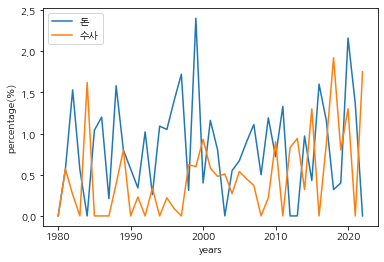

In [ ]:
#돈, 수사
plt.plot(crime_word_df.year,crime_word_df['돈'],label = '돈')
plt.plot(crime_word_df.year,crime_word_df['수사'],label = '수사')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

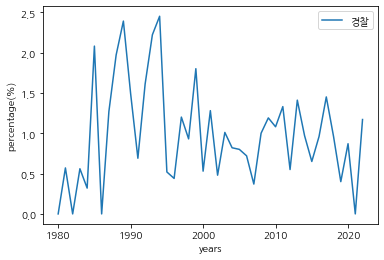

In [ ]:
#경찰, 범인
plt.plot(crime_word_df.year,crime_word_df['경찰'],label = '경찰')
#plt.plot(crime_word_df.year,crime_word_df['범인'],label = '범인')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('crime_keyword_police.jpeg',dpi=300)

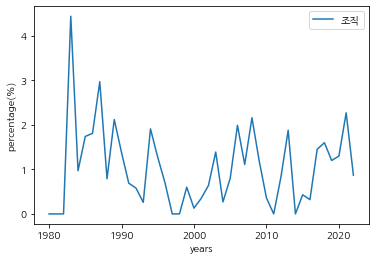

In [ ]:
#조직, 딸
plt.plot(crime_word_df.year,crime_word_df['조직'],label = '조직')
#plt.plot(crime_word_df.year,crime_word_df['딸'],label = '딸')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('crime_keyword_criminal_crew.jpeg',dpi=300)

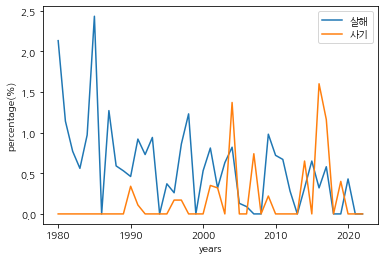

In [ ]:
#살해, 사기
plt.plot(crime_word_df.year,crime_word_df['살해'],label = '살해')
plt.plot(crime_word_df.year,crime_word_df['사기'],label = '사기')
plt.legend()
#plt.show()
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.savefig('crime_keyword_murder&fraud.jpeg',dpi=300)

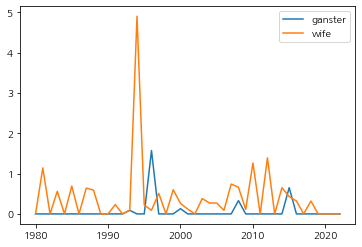

In [ ]:
#깡패, 아내
plt.plot(crime_word_df.year,crime_word_df['깡패'],label = '깡패')
plt.plot(crime_word_df.year,crime_word_df['아내'],label = '아내')
plt.legend()
plt.show()

# 로맨스영화

In [ ]:
#로맨스 영화 

DF_romance=DF[DF.genre.str.contains('로맨스')]
DF_romance


title  year  audience                 date                genre  \
13          헤어질 결심  2022   1886250  2022-06-29 00:00:00    멜로/로맨스, 드라마, 서스펜스   
59         해피 뉴 이어  2021    122596  2021-12-29 00:00:00          멜로/로맨스, 드라마   
62          로스트 시티  2022    113186  2022-04-20 00:00:00  액션, 코미디, 멜로/로맨스, 모험   
70     인민을 위해 복무하라  2022     79105  2022-02-23 00:00:00          멜로/로맨스, 드라마   
77    시맨틱 에러: 더 무비  2022     59206  2022-08-31 00:00:00               멜로/로맨스   
...            ...   ...       ...                  ...                  ...   
4273         꽃띠 여자  1979     28702  1979-12-22 00:00:00          드라마, 멜로/로맨스   
4274           외인들  1980     28685  1980-11-15 00:00:00          드라마, 멜로/로맨스   
4283           우요일  1980     24497  1980-04-17 00:00:00          드라마, 멜로/로맨스   
4284         타인의 방  1980     23666  1980-01-01 00:00:00          멜로/로맨스, 드라마   
4289        마지막 밀애  1980     20768  1980-04-26 00:00:00          드라마, 멜로/로맨스   

                                                  actor country  \
13             박해일(해준), 탕웨이(서래), 이정현(정안), 박해일, 탕웨이, 이정현    대한민국   
59             한지민(소진), 이동욱(용진), 강하늘(재용), 한지민, 이동욱, 강하늘    대한민국   
62    산드라 블록, 채닝 테이텀, 다니엘 래드클리프, 산드라 블록, 채닝 테이텀, 다니엘...      미국   
70            연우진(신무광), 지안(류수련), 조성하(사단장), 연우진, 지안, 조성하    대한민국   
77                         박서함(장재영), 박재찬(추상우), 박서함, 박재찬    대한민국   
...                                                 ...     ...   
4273                         정희, 김추련, 하명중, 정희, 김추련, 하명중    대한민국   
4274                       윤일봉, 김영애, 정한용, 윤일봉, 김영애, 정한용    대한민국   
4283                       윤일봉, 정윤희, 전양자, 윤일봉, 정윤희, 전양자    대한민국   
4284                       이영옥, 김추련, 이영하, 이영옥, 김추련, 이영하    대한민국   
4289                       유지인, 유장현, 정영숙, 유지인, 유장현, 정영숙    대한민국   

                        director       age  score  \
13                      박찬욱, 박찬욱   15세 관람가   8.68   
59                      곽재용, 곽재용   12세 관람가   7.05   
62    애덤 니, 아론 니, 애덤 니, 아론 니, 신고   12세 관람가   6.12   
70                      장철수, 장철수  청소년 관람불가   5.09   
77                      김수정, 김수정   12세 관람가   9.40   
...                          ...       ...    ...   
4273                노세한, 노세한, 신고  청소년 관람불가   0.00   
4274                고영남, 고영남, 신고  청소년 관람불가   5.67   
4283                박남수, 박남수, 신고  청소년 관람불가   5.60   
4284                    김문옥, 김문옥  청소년 관람불가   0.00   
4289                  김기, 김기, 신고  청소년 관람불가   6.00   

                                               synopsis  
13    ['산 정상에서 추락한 한 남자의 변사 사건.담당 형사 \'해준\'(박해일)은사망자...  
59    ['15년째 남사친에게 고백을 망설이는 호텔리어 ‘소진’그런 소진의 속도 모른 채 ...  
62    ['전설의 트레저를 차지하기 위해 재벌 페어팩스(다니엘 래드클리프)는 유일한 단서를...  
70    ['모범사병으로 사단장 사택의 취사병이 된 ‘무광’그의 목표는 오직 아내와 아이를 ...  
77    ["컴공과 '아싸' 추상우의 완벽하게 짜인 일상에 에러처럼 나타난 안하무인 디자인과...  
...                                                 ...  
4273  ['최세라는 버스안내양으로 정비기사 꼽슬에게 겁탈을 당하려는 순간 애인 김정호에게 ...  
4274  ['한강변의 한 아파트에 고등학교 선생 곽승엽과 매춘 행위로 살아가는 마금자, 그리...  
4283  ['우요일에 각별한 의미를 갖고 있는 음대생 수자는 제주도 여행에서 혁민이란 중년신...  
4284  ['눈꽃같은 하얀 웨딩드레스를 입고 윤태식과 결혼식을 올리던 민세영은 그 남자의 과...  
4289  ['한 여대생과 가정적으로 불행한 남자와의 아픈 사랑 이야기를 주체로 한 내용으로 ...  

[654 rows x 11 columns]

In [ ]:
# 로맨스영화 시놉시스 태깅(명사)
romance_synopsis_list = {}
for i in range(2022,1979,-1):
    romance_synopsis_list[i] = []
    sentences = DF_romance[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG']: #and len(word)>1:
                romance_synopsis_list[i].append(word)


<ipython-input-30-399a3ad002e4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_romance[DF.year==i]['synopsis'].values.tolist()


In [ ]:
romance_synopsis_list[2021]

['고백',
 '속도',
 '속',
 '결혼',
 '발표',
 '승',
 '효',
 '짝수',
 '강박증',
 '고생',
 '대표',
 '꿈',
 '생활',
 '시험',
 '낙방',
 '차',
 '일',
 '투숙객',
 '용',
 '뜻밖',
 '끝',
 '전성기',
 '마지막',
 '과',
 '상',
 '인연',
 '때',
 '때',
 '때',
 '눈물',
 '행복',
 '올해',
 '마지막',
 '마음',
 '자영',
 '후',
 '호기',
 '은퇴',
 '선언',
 '최후',
 '어',
 '상대',
 '검색',
 '일쑤',
 '뒤통수',
 '아픔',
 '잠시',
 '금',
 '칼럼',
 '가입',
 '아침',
 '이유',
 '마음',
 '자영',
 '기대',
 '서로',
 '급속도',
 '관계',
 '속',
 '속마음',
 '발',
 '이야기',
 '다',
 '꿈',
 '목표',
 '생활',
 '오랫동안',
 '간직',
 '기억',
 '속',
 '친구',
 '작정',
 '편지',
 '자신',
 '꿈',
 '엄마',
 '책방',
 '운영',
 '언니',
 '도착',
 '편지',
 '규칙',
 '언니',
 '대신',
 '답장',
 '사람',
 '편지',
 '시작',
 '편지',
 '사람',
 '일상',
 '시작',
 '비',
 '제안',
 '좌천',
 '신변',
 '보호',
 '업무',
 '신변',
 '보호',
 '요청',
 '재활',
 '트레이너',
 '타',
 '현지',
 '배달원',
 '통보',
 '작정',
 '결혼',
 '자금',
 '대표',
 '용',
 '찬',
 '발령',
 '신부',
 '링',
 '동생',
 '시누이',
 '혜',
 '세상',
 '래',
 '환',
 '앞',
 '장애',
 '시간',
 '행복',
 '이야기',
 '시작',
 '고백',
 '속도',
 '속',
 '결혼',
 '발표',
 '승',
 '효',
 '짝수',
 '강박증',
 '고생',
 '대표',
 '꿈',
 '생활',
 '시험',
 '낙방',
 '차',
 '일',
 '투숙객

In [ ]:
# 리스트 틀 만들기
romance_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
romance_si = pd.DataFrame(romance_synopsis_info)

In [ ]:
romance_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [ ]:
for i in range(2022,1979,-1):
    synopsis_data = Counter(romance_synopsis_list[i]).most_common()
    synopsis_m = sum(Counter(romance_synopsis_list[i]).values())
    new_data = {
        "연도": str(i),
        "1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        "2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        "3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        "4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        "5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        "6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        "7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        "8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        "9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        "10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(romance_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    romance_si = romance_si.append(new_data,ignore_index=True)

romance_si = romance_si.set_index("연도")

In [ ]:
romance_si

1위 키워드       2위 키워드       3위 키워드      4위 키워드       5위 키워드  \
연도                                                                    
2022  사랑 (3.12%)   자신 (2.50%)    딸 (2.50%)   해 (1.88%)   아내 (1.88%)   
2021  시작 (2.82%)  마지막 (2.42%)    때 (2.42%)   속 (2.02%)    꿈 (2.02%)   
2020   테 (7.48%)    사 (5.61%)   자신 (2.80%)  하루 (2.80%)   세상 (2.80%)   
2019  사람 (3.28%)   마음 (2.73%)   시작 (2.19%)  도시 (2.19%)   자신 (2.19%)   
2018   날 (4.50%)   자신 (3.60%)   사랑 (3.60%)   뒤 (2.70%)   기억 (2.70%)   
2017  운명 (3.10%)   시작 (3.10%)   사람 (3.10%)  아내 (3.10%)  아버지 (2.33%)   
2016  사람 (2.91%)   시작 (2.91%)   서로 (1.94%)  여자 (1.94%)   재현 (1.94%)   
2015   칠 (3.06%)   마음 (2.72%)   사람 (2.38%)   성 (2.38%)    금 (2.38%)   
2014  시작 (2.95%)   학규 (2.95%)   사랑 (2.41%)  사람 (1.88%)   자신 (1.61%)   
2013  사랑 (5.36%)   시작 (4.46%)    팀 (2.38%)  결혼 (2.08%)   능력 (1.49%)   
2012  사랑 (2.57%)   시작 (2.41%)   자신 (2.09%)  사람 (1.61%)   상처 (1.45%)   
2011  사랑 (2.97%)   사람 (1.83%)   시작 (1.60%)  자신 (1.60%)   세상 (1.37%)   
2010  사랑 (2.72%)   여자 (1.98%)    날 (1.73%)  최고 (1.23%)   자신 (1.23%)   
2009  사랑 (2.54%)    말 (1.84%)   자신 (1.69%)  친구 (1.41%)    날 (1.27%)   
2008  사랑 (4.08%)   시작 (1.69%)   결혼 (1.41%)  여자 (1.41%)    돈 (1.41%)   
2007  시작 (1.97%)   상민 (1.51%)    혁 (1.36%)  자신 (1.36%)    창 (1.21%)   
2006  사랑 (2.35%)    날 (1.96%)   자신 (1.49%)  사람 (1.25%)   친구 (1.25%)   
2005  작업 (3.10%)   사랑 (2.46%)   시작 (1.82%)  자신 (1.64%)   사람 (1.37%)   
2004  남자 (2.07%)   사랑 (1.87%)   자신 (1.81%)  여자 (1.61%)   마음 (1.10%)   
2003  사랑 (2.72%)   자신 (2.26%)   사람 (1.66%)   일 (1.53%)   시작 (1.13%)   
2002  사랑 (2.20%)   자신 (1.73%)   시작 (1.65%)  사람 (1.57%)   친구 (1.34%)   
2001  사랑 (3.60%)   자신 (2.57%)   여자 (1.80%)  사람 (1.54%)    날 (1.37%)   
2000  자신 (4.11%)   사랑 (2.19%)    위 (1.57%)  사람 (1.14%)    딸 (1.05%)   
1999  자신 (2.21%)   사랑 (1.86%)   사람 (1.63%)  항생 (1.52%)   서로 (1.28%)   
1998  사랑 (3.66%)   남자 (2.37%)   자신 (1.83%)  로비 (1.51%)   친구 (1.40%)   
1997  사랑 (2.85%)   사람 (1.86%)   은혜 (1.31%)  자신 (1.20%)   친구 (1.10%)   
1996   잔 (3.22%)   사랑 (2.22%)    길 (2.07%)  자신 (1.84%)   사람 (1.84%)   
1995  사랑 (2.33%)   자신 (2.23%)  대통령 (1.22%)  시작 (1.06%)   여자 (1.01%)   
1994  사랑 (2.82%)   여자 (1.99%)    입 (1.66%)  친구 (1.33%)   여인 (1.33%)   
1993  자신 (2.30%)   사랑 (2.06%)    큐 (1.50%)  결혼 (1.03%)    집 (1.03%)   
1992  사랑 (2.08%)   자신 (1.69%)    일 (1.38%)  아들 (1.15%)   여자 (1.15%)   
1991  사랑 (2.68%)   마을 (2.01%)   결혼 (1.45%)   집 (1.34%)   사람 (1.34%)   
1990  사랑 (2.57%)   자신 (2.16%)    일 (1.44%)  친구 (1.34%)    집 (1.03%)   
1989  사람 (2.40%)   자신 (1.85%)   사랑 (1.85%)  아내 (1.66%)   친구 (1.48%)   
1988  사랑 (2.06%)    집 (1.68%)   결혼 (1.50%)  생활 (1.50%)   아내 (1.50%)   
1987   후 (2.59%)   사랑 (2.16%)   생활 (1.72%)  아내 (1.72%)   자신 (1.29%)   
1986  사랑 (3.41%)   생활 (1.43%)    빅 (1.43%)  자신 (1.25%)    나 (1.25%)   
1985  사랑 (3.97%)    시 (1.98%)   생활 (1.59%)  진실 (1.39%)    속 (1.39%)   
1984  사랑 (2.17%)    영 (1.84%)   거리 (1.67%)  남편 (1.34%)    집 (1.34%)   
1983  사랑 (3.89%)   남편 (1.82%)   선영 (1.56%)  친구 (1.43%)   아내 (1.17%)   
1982  사랑 (3.89%)   아이 (1.52%)   만복 (1.52%)  결혼 (1.35%)   자신 (1.18%)   
1981  사랑 (2.78%)   작품 (1.59%)   선영 (1.59%)   집 (1.59%)    문 (1.19%)   
1980   금 (1.87%)    마 (1.31%)    혁 (1.31%)  동민 (1.31%)    티 (1.12%)   

           6위 키워드       7위 키워드      8위 키워드       9위 키워드      10위 키워드  
연도                                                                    
2022   조금 (1.88%)   위험 (1.88%)  목표 (1.88%)    삶 (1.88%)    산 (1.25%)  
2021   행복 (1.61%)   편지 (1.61%)  사람 (1.61%)   결혼 (1.21%)   대표 (1.21%)  
2020    체 (2.80%)   감정 (1.87%)  시작 (1.87%)   사랑 (1.87%)   낭만 (1.87%)  
2019   슈즈 (2.19%)    속 (1.64%)  생각 (1.64%)    일 (1.64%)   서로 (1.64%)  
2018  실험실 (2.70%)   여름 (1.80%)   앞 (1.80%)    속 (1.80%)   세상 (1.80%)  
2017   사랑 (2.33%)    성 (2.33%)   타 (2.33%)    말 (2.33%)  마지막 (1.55%)  
2016   코너 (1.94%)   행복 (1.94%)   꿈 (1.46%)   순간 (1.46%)   최고 (1.46%)  
2015    시 (2.04%)    후 (2.04%)  사이 (1.36%)   엄마 (1.36%)    길 (1.36%)  
2014    꿈 (1.34%)   분파 (1.34%)  결혼 (1.07%)   아내 (1.07%)   여자 (1.07%)  
2013   완벽 (1.49%)   마음 (1.49%)   

In [ ]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1979,-1):
  count_num_1 = romance_synopsis_list[i].count('결혼')
  count_num_2 = romance_synopsis_list[i].count('사랑')
  count_num_3 = romance_synopsis_list[i].count('남편')
  count_num_4 = romance_synopsis_list[i].count('아내')
  count_num_5 = romance_synopsis_list[i].count('생활')
  count_num_6 = romance_synopsis_list[i].count('마음')
  count_num_7 = romance_synopsis_list[i].count('행복')
  count_num_8 = romance_synopsis_list[i].count('아이')
  count_num_9 = romance_synopsis_list[i].count('여자')
  count_num_10 = romance_synopsis_list[i].count('남자')
  synopsis_m = sum(Counter(romance_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)


In [ ]:

romance_word_df_data={'year': year_data, '결혼': word_count_1_data, '사랑': word_count_2_data, '남편' : word_count_3_data, '아내' : word_count_4_data, '생활' : word_count_5_data, '마음' : word_count_6_data, '행복' :word_count_7_data, '아이' : word_count_8_data, '여자' : word_count_9_data, '남자': word_count_10_data}
romance_word_df = pd.DataFrame(romance_word_df_data)

romance_word_df

year    결혼    사랑    남편    아내    생활    마음    행복    아이    여자    남자
0   2022  1.25  3.12  0.00  1.88  0.00  0.00  0.00  0.62  0.00  0.62
1   2021  1.21  1.21  0.00  0.00  1.21  1.21  1.61  0.00  0.00  0.00
2   2020  0.00  1.87  0.00  0.00  0.00  1.87  0.93  0.00  0.00  0.93
3   2019  0.00  1.09  0.00  0.00  0.00  2.73  0.00  0.00  0.00  0.55
4   2018  0.00  3.60  0.00  0.00  0.00  0.00  1.80  0.00  0.00  0.00
5   2017  0.78  2.33  0.00  3.10  0.00  0.78  0.78  0.00  0.00  0.00
6   2016  0.00  1.46  0.00  0.00  0.00  1.46  1.94  0.00  1.94  1.46
7   2015  0.00  0.00  0.00  0.00  0.34  2.72  0.00  0.34  1.02  0.68
8   2014  1.07  2.41  0.27  1.07  0.27  0.54  0.27  0.00  1.07  0.00
9   2013  2.08  5.36  0.30  0.60  0.30  1.49  0.00  0.00  0.60  0.30
10  2012  0.16  2.57  0.32  0.80  0.32  1.29  0.16  0.64  0.80  0.80
11  2011  0.23  2.97  0.00  0.23  0.91  0.68  0.68  0.00  0.91  0.46
12  2010  1.23  2.72  0.99  0.00  0.49  0.25  0.25  0.00  1.98  0.25
13  2009  0.56  2.54  0.99  0.56  0.14  0.56  0.00  0.14  0.85  1.27
14  2008  1.41  4.08  0.56  0.00  0.56  0.56  0.56  0.28  1.41  1.27
15  2007  0.30  0.91  0.45  0.15  0.91  0.30  0.45  0.30  0.61  0.76
16  2006  0.55  2.35  0.23  0.08  0.16  1.17  0.08  0.08  0.55  1.10
17  2005  0.18  2.46  0.00  0.09  0.09  1.28  0.36  0.09  1.37  0.82
18  2004  0.90  1.87  0.19  0.32  0.39  1.10  0.06  0.06  1.61  2.07
19  2003  0.60  2.72  0.13  0.00  0.07  0.86  0.33  0.00  0.80  0.93
20  2002  1.18  2.20  0.63  0.24  0.24  0.55  0.24  0.08  0.47  0.39
21  2001  0.86  3.60  0.60  0.86  0.09  1.20  0.34  0.09  1.80  0.34
22  2000  0.35  2.19  0.00  0.17  0.35  0.52  0.09  0.17  0.00  0.35
23  1999  0.35  1.86  0.23  0.47  0.12  0.58  0.12  0.12  0.23  0.70
24  1998  0.65  3.66  0.00  0.75  0.54  0.65  0.43  0.11  0.65  2.37
25  1997  0.99  2.85  0.22  0.22  0.55  0.55  0.66  0.22  0.44  0.77
26  1996  0.92  2.22  0.15  0.38  0.38  0.38  0.31  0.08  0.77  0.69
27  1995  0.56  2.33  0.41  0.25  0.20  0.35  0.05  0.15  1.01  0.66
28  1994  1.16  2.82  0.50  0.00  0.33  0.17  0.50  0.00  1.99  1.00
29  1993  1.03  2.06  0.08  0.48  0.24  0.48  0.32  0.16  0.63  0.95
30  1992  0.54  2.08  0.85  0.69  0.46  0.69  0.08  0.77  1.15  0.54
31  1991  1.45  2.68  0.11  0.22  0.45  0.89  0.56  0.22  0.78  0.56
32  1990  0.93  2.57  0.41  0.10  0.82  0.10  0.51  0.00  0.51  0.41
33  1989  0.74  1.85  0.92  1.66  0.55  0.00  0.18  0.00  0.37  0.37
34  1988  1.50  2.06  0.37  1.50  1.50  0.37  0.19  0.19  0.37  0.37
35  1987  0.86  2.16  0.86  1.72  1.72  0.00  0.43  1.29  0.00  0.00
36  1986  0.54  3.41  0.36  0.00  1.43  0.54  0.00  0.18  1.08  0.72
37  1985  1.19  3.97  0.20  0.00  1.59  0.20  0.40  0.79  0.40  0.79
38  1984  0.67  2.17  1.34  0.33  0.50  0.00  0.17  0.33  0.84  0.17
39  1983  0.52  3.89  1.82  1.17  0.39  0.78  0.13  0.13  0.39  0.91
40  1982  1.35  3.89  0.84  0.17  0.34  0.17  0.17  1.52  0.68  0.84
41  1981  0.99  2.78  0.40  0.40  0.40  0.40  0.60  0.60  0.00  0.60
42  1980  0.37  0.75  0.75  0.19  0.56  1.12  0.00  0.00  1.12  0.93

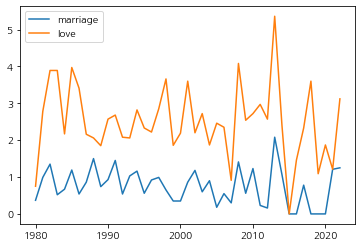

In [ ]:
#결혼, 사랑 
plt.plot(romance_word_df.year,romance_word_df['결혼'],label = '결혼')
plt.plot(romance_word_df.year,romance_word_df['사랑'],label = '사랑')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

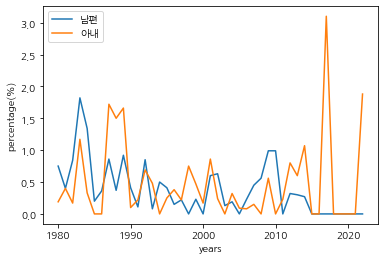

In [ ]:
#남편, 아내 
plt.plot(romance_word_df.year,romance_word_df['남편'],label = '남편')
plt.plot(romance_word_df.year,romance_word_df['아내'],label = '아내')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('romance_keyword_husband&wife.jpeg',dpi=300)

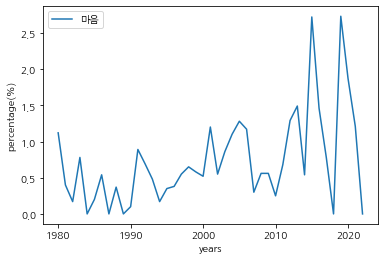

In [ ]:
#생활, 마음
#plt.plot(romance_word_df.year,romance_word_df['생활'],label = '생활')
plt.plot(romance_word_df.year,romance_word_df['마음'],label = '마음')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('romance_keyword_heart.jpeg',dpi=300)

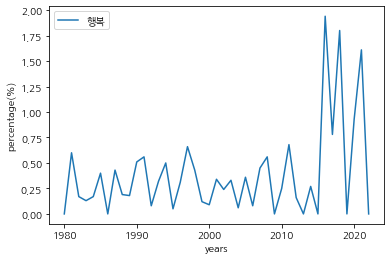

In [ ]:
#행복, 아이
plt.plot(romance_word_df.year,romance_word_df['행복'],label = '행복')
#plt.plot(romance_word_df.year,romance_word_df['아이'],label = '아이')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('romance_keyword_happiness.jpeg',dpi=300)
#plt.savefig('romance_keyword_child.jpeg',dpi=300)

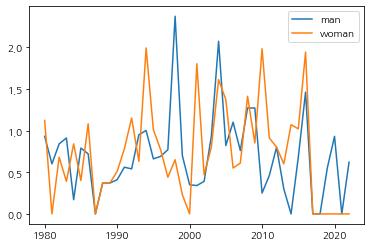

In [ ]:
#남자, 여자
plt.plot(romance_word_df.year,romance_word_df['남자'],label = '남자')
plt.plot(romance_word_df.year,romance_word_df['여자'],label = '여자')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

# 액션영화

In [10]:
#액션 영화 

DF_action=DF[DF.genre.str.contains('액션')]
DF_action

title  year  audience                 date        genre  \
0                  범죄도시 2  2022  12693023  2022-05-18 00:00:00       범죄, 액션   
1                 탑건: 매버릭  2022   8171923  2022-06-22 00:00:00           액션   
2               한산: 용의 출현  2022   7262885  2022-07-27 00:00:00      액션, 드라마   
3              공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00      액션, 코미디   
4     닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00  액션, 판타지, 모험   
...                   ...   ...       ...                  ...          ...   
4246              바다의 늑대들  1980     64616  1980-12-18 00:00:00       액션, 전쟁   
4248                   애권  1980     61286  1980-04-24 00:00:00      액션, 코미디   
4269           오사까의 외로운 별  1980     30271  1980-06-21 00:00:00      액션, 드라마   
4279              지옥 12관문  1980     26185  1980-05-24 00:00:00           액션   
4291               무림 악인전  1980     20342  1980-04-10 00:00:00           액션   

                                                  actor  country  \
0           마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화     대한민국   
1     톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...       미국   
2     박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기     대한민국   
3               현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아     대한민국   
4     베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...       미국   
...                                                 ...      ...   
4246       그레고리 펙, 로저 무어, 데이빗 니븐, 그레고리 펙, 로저 무어, 데이빗 니븐  스위스, 영국   
4248                       강용석, 배수천, 윤상미, 강용석, 배수천, 윤상미     대한민국   
4269                       김희라, 이경실, 박근형, 김희라, 이경실, 박근형     대한민국   
4279                         거룡, 김민정, 김영일, 거룡, 김민정, 김영일     대한민국   
4291                       정진화, 서영란, 장일식, 정진화, 서영란, 장일식     대한민국   

                          director       age  score  \
0                         이상용, 이상용   15세 관람가   9.32   
1                 조셉 코신스키, 조셉 코신스키   12세 관람가   9.76   
2                         김한민, 김한민   12세 관람가   8.75   
3                         이석훈, 이석훈   15세 관람가   8.44   
4                     샘 레이미, 샘 레이미   12세 관람가   7.22   
...                            ...       ...    ...   
4246  앤드류 V. 맥라글렌, 앤드류 V. 맥라글렌, 신고        PG   9.00   
4248                  이형표, 이형표, 신고  청소년 관람불가   6.00   
4269                  김효천, 김효천, 신고   12세 관람가   0.00   
4279                      이혁수, 이혁수  청소년 관람불가   0.00   
4291                  김정용, 김정용, 신고       nan   7.00   

                                               synopsis  
0     ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1     ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2     ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3     ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4     ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
...                                                 ...  
4246  ["2차대전 중 독일의 유보트 함대 중 한 척이 인도양을 지나가는 연합군의 함대 및...  
4248  ['돈벌이 살인 무술대회에 서 죽은 아버지의 원수 옥달평을 찾아 황석불은 만주에 오...  
4269  ['일본 광도에서 고아가 된 가네모도는 자기를 길러준 회장을 살해한 조총련의 아사오...  
4279  ['세계적인 액숀스타 이대룡은 돌연한 죽음으로 지옥에 끌려간다. 그곳에서 그는 자기...  
4291  ['고구려가 요동땅을 다스릴때 막대한 황금엽전을 그곳에 매장한다. 고려왕조가 기울어...  

[1305 rows x 11 columns]

In [11]:
#액션영화 시놉시스 태깅(명사)
action_synopsis_list = {}
for i in range(2022,1979,-1):
    action_synopsis_list[i] = []
    sentences = DF_action[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['한편', '시작']: #and len(word)>1:
                action_synopsis_list[i].append(word)

<ipython-input-11-8fa559056dd3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_action[DF.year==i]['synopsis'].values.tolist()


In [12]:
# 리스트 틀 만들기
action_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
action_si = pd.DataFrame(action_synopsis_info)

In [13]:
for i in range(2022,1979,-1):
    synopsis_data = Counter(action_synopsis_list[i]).most_common()
    synopsis_m = sum(Counter(action_synopsis_list[i]).values())
    new_data = {
        "연도": str(i),
        "1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        "2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        "3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        "4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        "5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        "6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        "7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        "8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        "9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        "10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(action_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    action_si = action_si.append(new_data,ignore_index=True)

action_si = action_si.set_index("연도")

In [14]:
action_si

1위 키워드      2위 키워드       3위 키워드       4위 키워드       5위 키워드  \
연도                                                                    
2022   속 (1.50%)  위기 (0.92%)   위험 (0.81%)   운명 (0.81%)    팀 (0.81%)   
2021  자신 (1.80%)  세상 (1.65%)   사람 (1.35%)    앞 (1.20%)   운명 (1.20%)   
2020  자신 (2.02%)  세상 (1.82%)    인 (1.62%)   위기 (1.21%)   사건 (1.21%)   
2019  자신 (1.73%)   속 (1.11%)   작전 (0.99%)    창 (0.99%)   요원 (0.99%)   
2018  세계 (1.39%)  자신 (1.26%)   세상 (1.13%)   전쟁 (1.01%)   기업 (0.88%)   
2017  세상 (2.36%)  자신 (1.50%)   조직 (1.29%)   세계 (1.18%)   전쟁 (0.96%)   
2016  세상 (1.65%)  사람 (1.14%)    속 (1.14%)   세계 (1.14%)  아버지 (0.89%)   
2015  자신 (1.74%)  요원 (1.39%)   사건 (1.16%)   세상 (0.93%)   위험 (0.93%)   
2014  자신 (2.21%)  위기 (1.25%)    속 (1.25%)   전쟁 (1.06%)   세상 (0.96%)   
2013  자신 (1.53%)  사람 (1.45%)   공격 (1.15%)   세계 (1.07%)    속 (0.99%)   
2012  자신 (1.76%)  세계 (1.48%)   최고 (1.11%)   사람 (1.11%)   작전 (1.02%)   
2011  인간 (1.98%)  자신 (1.81%)   세계 (1.65%)   시간 (1.48%)   전쟁 (1.48%)   
2010  자신 (2.11%)  사람 (1.05%)   위험 (0.97%)   최고 (0.97%)    팀 (0.97%)   
2009   속 (1.36%)  자신 (1.08%)   인류 (1.02%)   사건 (0.96%)   조직 (0.91%)   
2008  자신 (1.29%)   속 (1.18%)   사람 (1.02%)   조직 (1.02%)   지구 (0.97%)   
2007  자신 (1.76%)  세계 (1.50%)   전쟁 (1.14%)    속 (1.06%)    힘 (1.06%)   
2006  자신 (2.07%)  조직 (1.40%)   사람 (0.96%)    속 (0.72%)    날 (0.68%)   
2005  자신 (1.32%)  사건 (0.88%)   사람 (0.71%)   인간 (0.71%)   남자 (0.66%)   
2004  자신 (1.86%)  인간 (1.20%)   사람 (0.99%)   죽음 (0.77%)    속 (0.71%)   
2003  자신 (1.40%)  인간 (1.23%)   임무 (0.76%)   인류 (0.72%)   목숨 (0.68%)   
2002  자신 (2.44%)  요원 (1.03%)   친구 (0.88%)    후 (0.78%)   사람 (0.64%)   
2001  자신 (1.33%)  사건 (1.29%)   대회 (0.90%)   사랑 (0.78%)   경찰 (0.70%)   
2000  자신 (1.79%)  사건 (1.21%)   사랑 (0.89%)   인간 (0.76%)   사람 (0.76%)   
1999  사람 (0.97%)  자신 (0.91%)   사건 (0.85%)    돈 (0.79%)   발견 (0.73%)   
1998  자신 (1.44%)  안보 (1.02%)   국가 (0.91%)   사건 (0.86%)   임무 (0.75%)   
1997  자신 (1.58%)   쇼 (1.21%)   훈련 (0.91%)   아내 (0.79%)   요원 (0.79%)   
1996  자신 (2.45%)   길 (1.09%)   조직 (0.92%)   사람 (0.85%)    돈 (0.75%)   
1995  자신 (1.05%)  사람 (0.81%)   세계 (0.73%)   머니 (0.73%)    일 (0.73%)   
1994  아내 (1.31%)  사랑 (1.10%)   무기 (0.94%)    일 (0.89%)   제자 (0.84%)   
1993  경찰 (1.15%)  방세 (1.06%)   사건 (0.75%)   사람 (0.75%)  아버지 (0.71%)   
1992   일 (1.19%)  자신 (1.02%)   사람 (1.02%)   사랑 (0.81%)    용 (0.81%)   
1991  자신 (2.09%)  사람 (1.02%)   사랑 (0.83%)    뒤 (0.74%)   살해 (0.70%)   
1990  사람 (1.03%)  경찰 (0.99%)    일 (0.86%)    코 (0.86%)   자신 (0.86%)   
1989  조직 (2.59%)  자신 (0.96%)   경찰 (0.86%)  아버지 (0.77%)    후 (0.77%)   
1988  영화 (1.55%)  경찰 (1.45%)   조직 (1.35%)   사건 (1.14%)    왕 (0.93%)   
1987  자신 (1.25%)  조직 (1.25%)   구출 (1.03%)   친구 (0.89%)   일당 (0.89%)   
1986   집 (1.57%)  구출 (1.47%)    칸 (1.38%)    혹 (1.08%)   일행 (1.08%)   
1985   달 (1.80%)  조직 (1.50%)    칩 (1.20%)    형 (1.20%)    쇄 (1.20%)   
1984  아들 (1.48%)  자신 (1.30%)    후 (1.30%)    일 (1.20%)   기계 (1.11%)   
1983   사 (1.37%)  조직 (1.23%)    손 (1.23%)   마을 (1.23%)   경찰 (1.10%)   
1982  제자 (1.46%)  창구 (1.14%)    하 (1.14%)    곤 (0.97%)    검 (0.97%)   
1981  형제 (2.20%)   라 (1.68%)  고아원 (1.29%)    길 (1.16%)   대담 (1.16%)   
1980  대회 (1.80%)   길 (1.60%)    뒤 (1.00%)   태중 (1.00%)   석불 (1.00%)   

           6위 키워드       7위 키워드       8위 키워드       9위 키워드      10위 키워드  
연도                                                                     
2022    선 (0.81%)    후 (0.69%)   범죄 (0.69%)   자신 (0.69%)   모두 (0.69%)  
2021   시대 (0.90%)    힘 (0.90%)   위험 (0.90%)   조직 (0.90%)   최악 (0.75%)  
2020  마지막 (1.01%)   세계 (1.01%)   위협 (0.81%)   납치 (0.81%)   추격 (0.81%)  
2019   세상 (0.86%)    인 (0.74%)   공격 (0.74%)   출신 (0.74%)   사람 (0.74%)  
2018   지구 (0.88%)   이름 (0.88%)    속 (0.88%)   최고 (0.76%)   존재 (0.76%)  
2017   사건 (0.96%)   인간 (0.96%)   임무 (0.86%)   위협 (0.86%)   존재 (0.86%)  
2016    전 (0.89%)   자신 (0.89%)    날 (0.89%)   데스 (0.76%)   전쟁 (0.76%)  
2015   인류 (0.93%)   조직 (0.93%)   사람 (0.93%)   최고 (0.81%)   최악 (0.81%)  
2014   세계 (0.87%)   상황 (0.77%)    날 (0.77%)   인간 (0.77%)    후 (0.67%)  
2013   인류 (0.99%)   지구

In [15]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
word_count_11_data=[]
year_data=[]
for i in range(2022,1979,-1):
  count_num_1 = action_synopsis_list[i].count('구출')
  count_num_2 = action_synopsis_list[i].count('조직')
  count_num_3 = action_synopsis_list[i].count('세계')
  count_num_4 = action_synopsis_list[i].count('요원')
  count_num_5 = action_synopsis_list[i].count('전쟁')
  count_num_6 = action_synopsis_list[i].count('인간')
  count_num_7 = action_synopsis_list[i].count('복수')
  count_num_8 = action_synopsis_list[i].count('세상')
  count_num_9 = action_synopsis_list[i].count('경찰')
  count_num_10 = action_synopsis_list[i].count('임무')
  count_num_11 = action_synopsis_list[i].count('위험')
  synopsis_m = sum(Counter(action_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  word_count_11_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)

In [16]:
action_word_df_data={'year': year_data, '구출': word_count_1_data, '조직': word_count_2_data, '세계' : word_count_3_data, '요원' : word_count_4_data, '전쟁' : word_count_5_data, '인간' : word_count_6_data, '복수' :word_count_7_data, '세상' : word_count_8_data, '경찰' : word_count_9_data, '임무': word_count_10_data, '위험' : word_count_11_data}
action_word_df = pd.DataFrame(action_word_df_data)

action_word_df

year    구출    조직    세계    요원    전쟁    인간    복수    세상    경찰    임무    위험
0   2022  0.00  0.58  0.69  0.23  0.35  0.58  0.23  0.58  0.12  0.35  0.35
1   2021  0.00  0.90  0.45  0.30  0.45  0.60  0.15  1.65  0.00  0.15  0.15
2   2020  0.00  0.40  1.01  0.61  0.40  0.40  0.40  1.82  0.00  0.00  0.00
3   2019  0.00  0.62  0.49  0.99  0.37  0.00  0.12  0.86  0.25  0.25  0.25
4   2018  0.00  0.76  1.39  0.38  1.01  0.63  0.00  1.13  0.25  0.38  0.38
5   2017  0.32  1.29  1.18  0.75  0.96  0.96  0.11  2.36  0.32  0.86  0.86
6   2016  0.00  0.25  1.14  0.38  0.76  0.63  0.25  1.65  0.38  0.25  0.25
7   2015  0.00  0.93  0.46  1.39  0.46  0.70  0.00  0.93  0.35  0.46  0.46
8   2014  0.00  0.38  0.87  0.29  1.06  0.77  0.10  0.96  0.29  0.10  0.10
9   2013  0.00  0.31  1.07  0.69  0.31  0.53  0.08  0.53  0.23  0.53  0.53
10  2012  0.09  0.37  1.48  1.02  0.93  0.09  0.19  0.83  0.28  0.65  0.65
11  2011  0.00  0.82  1.65  0.25  1.48  1.98  0.41  0.74  0.16  0.41  0.41
12  2010  0.00  0.73  0.32  0.73  0.97  0.41  0.16  0.89  0.32  0.24  0.24
13  2009  0.00  0.91  0.74  0.17  0.51  0.79  0.23  0.62  0.51  0.51  0.51
14  2008  0.00  1.02  0.91  0.38  0.21  0.21  0.00  0.32  0.16  0.16  0.16
15  2007  0.00  0.79  1.50  0.26  1.14  0.18  0.09  0.44  0.18  0.00  0.00
16  2006  0.14  1.40  0.53  0.34  0.48  0.39  0.14  0.53  0.24  0.48  0.48
17  2005  0.04  0.53  0.31  0.26  0.18  0.71  0.09  0.31  0.40  0.44  0.44
18  2004  0.05  0.66  0.66  0.27  0.27  1.20  0.49  0.66  0.22  0.27  0.27
19  2003  0.13  0.51  0.68  0.51  0.64  1.23  0.42  0.42  0.08  0.76  0.76
20  2002  0.10  0.29  0.44  1.03  0.49  0.34  0.05  0.34  0.49  0.10  0.10
21  2001  0.08  0.59  0.62  0.12  0.35  0.27  0.04  0.20  0.70  0.08  0.08
22  2000  0.00  0.13  0.40  0.18  0.49  0.76  0.13  0.45  0.40  0.31  0.31
23  1999  0.00  0.55  0.24  0.42  0.06  0.67  0.24  0.30  0.42  0.30  0.30
24  1998  0.00  0.16  0.27  0.64  0.21  0.21  0.05  0.05  0.64  0.75  0.75
25  1997  0.18  0.42  0.36  0.79  0.30  0.12  0.06  0.06  0.61  0.48  0.48
26  1996  0.10  0.92  0.41  0.41  0.07  0.10  0.07  0.00  0.41  0.44  0.44
27  1995  0.12  0.53  0.73  0.20  0.08  0.40  0.36  0.08  0.65  0.08  0.08
28  1994  0.31  0.68  0.10  0.26  0.16  0.00  0.26  0.05  0.58  0.42  0.42
29  1993  0.26  0.09  0.31  0.13  0.04  0.53  0.13  0.00  1.15  0.44  0.44
30  1992  0.09  0.34  0.17  0.13  0.17  0.38  0.34  0.00  0.51  0.17  0.17
31  1991  0.09  0.56  0.19  0.09  0.19  0.19  0.14  0.09  0.42  0.42  0.42
32  1990  0.09  0.52  0.56  0.09  0.17  0.56  0.17  0.04  0.99  0.22  0.22
33  1989  0.10  2.59  0.38  0.48  0.00  0.10  0.19  0.29  0.86  0.19  0.19
34  1988  0.31  1.35  0.21  0.52  0.00  0.00  0.31  0.21  1.45  0.41  0.41
35  1987  1.03  1.25  0.07  0.66  0.00  0.22  0.30  0.00  0.74  0.30  0.30
36  1986  1.47  0.39  0.29  0.00  0.10  0.00  0.20  0.39  0.59  0.39  0.39
37  1985  1.00  1.50  0.00  0.20  0.20  0.20  0.20  0.00  0.90  0.70  0.70
38  1984  0.83  0.46  0.19  0.00  0.19  1.11  0.28  0.00  0.65  0.19  0.19
39  1983  0.55  1.23  0.00  0.00  0.27  0.00  0.00  0.00  1.10  0.14  0.14
40  1982  0.00  0.32  0.32  0.32  0.00  0.00  0.81  0.32  0.00  0.00  0.00
41  1981  0.00  0.26  0.13  0.13  0.13  0.26  0.00  0.00  0.26  0.13  0.13
42  1980  0.20  0.00  0.60  0.00  0.00  0.00  0.20  0.00  0.20  0.20  0.20

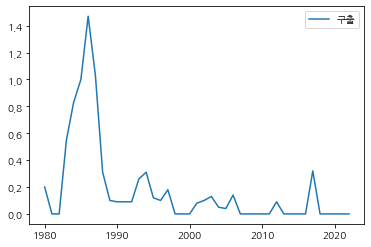

In [ ]:
#구출, 조직
plt.plot(action_word_df.year,action_word_df['구출'],label = '구출')
#plt.plot(action_word_df.year,action_word_df['조직'],label = '조직')
plt.legend()
#plt.show()
#plt.savefig('action_keyword_crew.jpeg',dpi=300)
plt.savefig('action_keyword_save.jpeg',dpi=300)

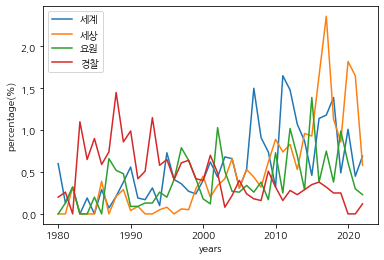

In [19]:
#세계, 세상, 요원, 경찰
plt.plot(action_word_df.year,action_word_df['세계'],label = '세계')
plt.plot(action_word_df.year,action_word_df['세상'],label = '세상')
plt.plot(action_word_df.year,action_word_df['요원'],label = '요원')
plt.plot(action_word_df.year,action_word_df['경찰'],label = '경찰')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('action_keyword_world&globe&agent&police.jpeg',dpi=300)

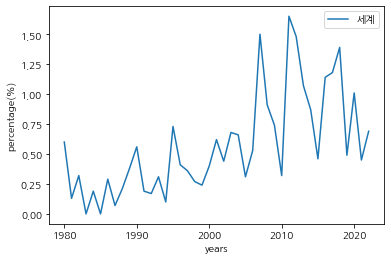

In [ ]:
#세계, 요원
plt.plot(action_word_df.year,action_word_df['세계'],label = '세계')
#plt.plot(action_word_df.year,action_word_df['요원'],label = '요원')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('action_keyword_world.jpeg',dpi=300)
#plt.savefig('action_keyword_agent.jpeg',dpi=300)

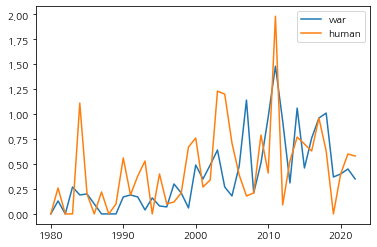

In [ ]:
#전쟁, 인간
plt.plot(action_word_df.year,action_word_df['전쟁'],label = '전쟁')
plt.plot(action_word_df.year,action_word_df['인간'],label = '인간')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()

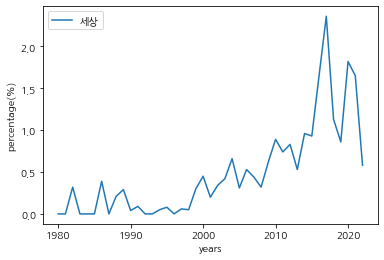

In [ ]:
#복수, 세상
#plt.plot(action_word_df.year,action_word_df['복수'],label = '복수')
plt.plot(action_word_df.year,action_word_df['세상'],label = '세상')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('action_keyword_globe.jpeg', dpi=300)

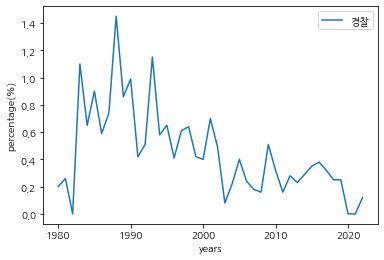

In [ ]:
#경찰, 임무
plt.plot(action_word_df.year,action_word_df['경찰'],label = '경찰')
#plt.plot(action_word_df.year,action_word_df['임무'],label = '임무')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('action_keyword_police.jpeg',dpi=300)

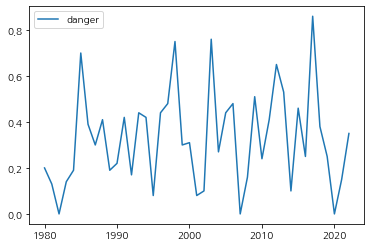

In [ ]:
#위험
plt.plot(action_word_df.year,action_word_df['위험'],label = 'danger')
plt.legend()
plt.show()